Acurácia do modelo: 1.00
Matriz de Confusão:
[[25  0]
 [ 0 15]]


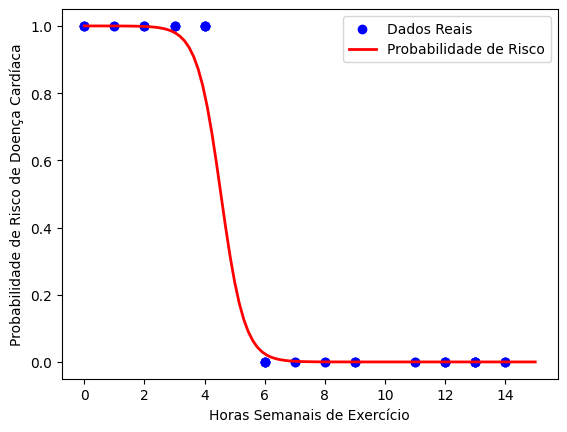

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Gerando dados fictícios
np.random.seed(42)
horas_exercicio = np.random.randint(0, 15, 200)  # Horas semanais de atividade física
risco_doenca = (horas_exercicio < 5).astype(int)  # 1 se < 5 horas, 0 se >= 5 horas

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(horas_exercicio.reshape(-1, 1), risco_doenca, test_size=0.2, random_state=42)

# Criando e treinando o modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Avaliando o modelo
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {acuracia:.2f}")

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Visualizando a regressão logística
X_vals = np.linspace(0, 15, 100).reshape(-1, 1)
y_probs = modelo.predict_proba(X_vals)[:, 1]
plt.scatter(X_test, y_test, color='blue', label='Dados Reais')
plt.plot(X_vals, y_probs, color='red', linewidth=2, label='Probabilidade de Risco')
plt.xlabel('Horas Semanais de Exercício')
plt.ylabel('Probabilidade de Risco de Doença Cardíaca')
plt.legend()
plt.show()
